# **Waze Project**

# Regression modeling

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.

### Imports and data loading

In [ ]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for Logistic Regression & Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [ ]:
# Load the dataset by running this cell

df = pd.read_csv('waze_dataset.csv')

### Explore data with EDA

In [ ]:
print(df.shape)
print(df.info())

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None


There are 700 missing values of label variable.

In [ ]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [ ]:
df=df.drop(columns='ID')

In [ ]:
# check the class balance of the dependent (target) variable, label.
df.groupby(['label'])['label'].count()

label
churned      2536
retained    11763
Name: label, dtype: int64

In [ ]:
### YOUR CODE HERE ###
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Variables 'sessions','drives','total sessions','driven_km_drives','duration_minutes_drives' probaply have outliers.

### Create features

#### **`km_per_driving_day`**

In [ ]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['drives']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_driving_day, dtype: float64

Some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

In [ ]:
# 1. Convert infinite values to zero
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

In [ ]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [ ]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
print(' ')
prof_churned = df[(df['label'] == 'churned') & (df['professional_driver'] == 1)]['professional_driver'].count()
non_prof_churned = df[(df['label'] == 'churned') & (df['professional_driver'] == 0)]['professional_driver'].count()
total_prof = df[df['professional_driver'] == 1]['label'].count()
total_non_prof = df[df['professional_driver'] == 0]['label'].count()
print('Churn rate for professional drivers: ' + str(round(prof_churned/total_prof * 100, 2)) +'%')
print('Churn rate for non-professional drivers: ' + str(round(non_prof_churned/total_non_prof * 100, 2)) +'%')

0    12405
1     2594
Name: professional_driver, dtype: int64
 
Churn rate for professional drivers: 7.56%
Churn rate for non-professional drivers: 19.88%


The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### Preparing variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

In [ ]:
# Drop rows with missing data in `label` column
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
 12  km_per_driving_day       14299 non-null  float64
 13  professional_driver      14299 non-null  int64  
dtypes: float64(4), int64(8

#### **Impute outliers**

In [ ]:
# Impute outliers
def impute_95perc(column):
    perc95 = column.quantile(0.95)
    for i in range(len(column)):
        if column.iloc[i] > perc95:
            column.iloc[i] = perc95
    return column

for column in [df['sessions'],df['drives'],df['total_sessions'],df['total_navigations_fav1'],df['total_navigations_fav2'],df['driven_km_drives'],df['duration_minutes_drives']]:
    impute_95perc(column)

In [ ]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,232.269197,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,616.197409,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,32.486524,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,72.947059,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,179.347527,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15777.426560,1.000000


#### **Encode categorical variables**

Assign a `0` for all `retained` users.
Assign a `1` for all `churned` users.

In [ ]:
# Create binary `label2` column
df['label2'] = np.where(df['label'] == 'retained', 0, 1)
df.head(10)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,1,0
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,128.186173,0,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,0,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,1,0
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,0,0
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,0,0
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,0,0
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,0,0
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,0,1


### Determine whether assumptions have been met

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

#### **Collinearity**

In [ ]:
# Generate a correlation matrix
corr_matrix = df.corr(method='pearson')

Now, plot a correlation heatmap.

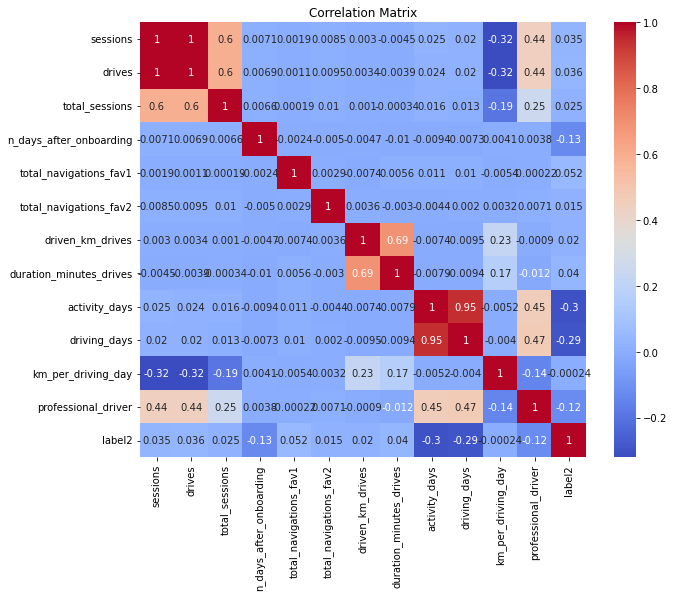

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Question:** Which variables are multicollinear with each other?

driving_days and activity_days \
sessions and drives \
duration_minutes_drives and driven_km_drives can also be considered as multicollinear

### Create dummies (if necessary)

In [ ]:
# Create new `device2` variable
df['device2'] = np.where(df['device'] == 'Android', 0, 1)
df.head(10)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2,device2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,1,0,0
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,128.186173,0,0,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,0,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,0,0,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,1,0,0
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,0,0,1
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,0,0,1
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,0,0,1
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,0,0,0
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,0,1,1


### Model building

#### **Assign predictor variables and target**

In [ ]:
# Isolate predictor variables
X = df.drop(['label','label2','device','sessions','driving_days'], axis=1)
X.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
0,200,296.748273,2276,208,0,2628.845068,1985.775061,28,11.632058,1,0
1,107,326.896596,1225,19,64,8898.716275,3160.472914,13,128.186173,0,1
2,95,135.522926,2651,0,0,3059.148818,1610.735904,14,32.201567,0,0
3,40,67.589221,15,322,7,913.591123,587.196542,7,22.839778,0,1
4,68,168.247020,1562,166,5,3950.202008,1219.555924,27,58.091206,1,0


Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [ ]:
# Isolate target variable
y = df['label2']

#### **Split the data**

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
11392,19,86.281190,2203,201,110,3580.338100,1057.303629,19,188.438847,0,1
2374,41,110.899777,422,0,6,6812.139394,4668.180092,23,166.149741,0,1
10507,10,245.486327,39,5,0,5272.033575,3752.858246,5,527.203358,0,0
14753,200,294.162652,424,156,15,652.754712,388.985099,0,3.184169,0,0
2842,81,165.304898,1853,47,9,1180.426445,551.882803,19,14.573166,0,1


Fit the model on `X_train` and `y_train`.

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
variables = X.columns
coefs = clf.coef_
series = pd.Series(coefs[0].tolist(), index=variables)
series

drives                     0.002455
total_sessions             0.000040
n_days_after_onboarding   -0.000375
total_navigations_fav1     0.001276
total_navigations_fav2     0.000801
driven_km_drives          -0.000026
duration_minutes_drives    0.000110
activity_days             -0.105139
km_per_driving_day         0.000052
professional_driver       -0.001474
device2                   -0.000896
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [ ]:
clf.intercept_[0]

-0.0014931328631257468

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

In [ ]:
# Get the predicted probabilities of the training data
probs = clf.predict_proba(X_train)
probs.tolist()

[[0.9168414824929773, 0.08315851750702274],
 [0.8933209240511911, 0.10667907594880885],
 [0.5495489559200037, 0.45045104407999625],
 [0.35912281526813417, 0.6408771847318658],
 [0.9162476898469548, 0.08375231015304514],
 [0.4773931938085292, 0.5226068061914708],
 [0.9269516414009943, 0.07304835859900567],
 [0.9322344789895091, 0.06776552101049091],
 [0.8481568014484995, 0.15184319855150047],
 [0.9563741761548449, 0.04362582384515515],
 [0.5867730447701638, 0.41322695522983627],
 [0.9272608637511565, 0.07273913624884353],
 [0.631767878161841, 0.36823212183815907],
 [0.80086497547342, 0.19913502452658002],
 [0.9704145555632953, 0.029585444436704782],
 [0.7955007120003623, 0.20449928799963774],
 [0.952827437295773, 0.047172562704227025],
 [0.6681324665463102, 0.3318675334536898],
 [0.8118783463080548, 0.18812165369194525],
 [0.7340628263741598, 0.26593717362584024],
 [0.9370736860247528, 0.06292631397524716],
 [0.9612312784427663, 0.038768721557233626],
 [0.5828075480468055, 0.41719245195

In [ ]:
dfprobs = pd.DataFrame(probs, columns=['retained', 'churned'])
dfprobs

,retained,churned
0,0.916841,0.083159
1,0.893321,0.106679
2,0.549549,0.450451
3,0.359123,0.640877
4,0.916248,0.083752
...,...,...
11434,0.961890,0.038110
11435,0.781439,0.218561
11436,0.913497,0.086503
11437,0.885959,0.114041


In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [ ]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(dfprobs['churned'][i]/dfprobs['retained'][i]) for i in range(len(logit_data))]
logit_data.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2,logit
11392,19,86.281190,2203,201,110,3580.338100,1057.303629,19,188.438847,0,1,-2.400186
2374,41,110.899777,422,0,6,6812.139394,4668.180092,23,166.149741,0,1,-2.125121
10507,10,245.486327,39,5,0,5272.033575,3752.858246,5,527.203358,0,0,-0.198848
14753,200,294.162652,424,156,15,652.754712,388.985099,0,3.184169,0,0,0.579173
2842,81,165.304898,1853,47,9,1180.426445,551.882803,19,14.573166,0,1,-2.392423


Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

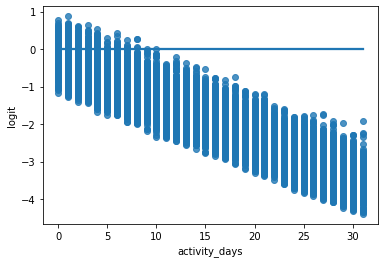

In [ ]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, logistic=True, ci=None)
plt.show()

### Results and evaluation

In [ ]:
# Generate predictions on X_test
y_pred = clf.predict(X_test)

In [ ]:
# Score the model (accuracy) on the test data
print("Accuracy:", str(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.8262237762237762


### Show results with a confusion matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

<Figure size 1080x1080 with 0 Axes>

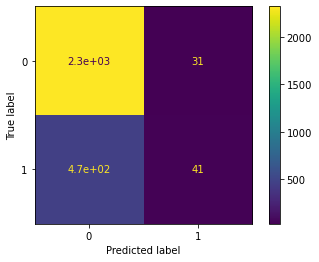

In [ ]:
plt.figure(figsize=(15, 15))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()

You can use the confusion matrix to compute precision and recall manually.

In [ ]:
# Calculate precision manually
precision = 41/(41+31)
precision

0.5694444444444444

In [ ]:
# Calculate recall manually
recall = 41/(41+470)
recall

0.08023483365949119

In [ ]:
# Create a classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2353
           1       0.57      0.08      0.14       507

    accuracy                           0.83      2860
   macro avg       0.70      0.53      0.52      2860
weighted avg       0.79      0.83      0.77      2860



### **BONUS**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [ ]:
# Create a list of (column_name, coefficient) tuples
tuples_list = list(zip(series.index, coefs[0].tolist()))

# Sort the list by coefficient value
sorted_tuples = sorted(tuples_list, key=lambda x: x[1])

features = pd.DataFrame(tuples_list, columns=['feature','coefficient']).sort_values(by='coefficient')
features

,feature,coefficient
7,activity_days,-0.105139
9,professional_driver,-0.001474
10,device2,-0.000896
2,n_days_after_onboarding,-0.000375
5,driven_km_drives,-0.000026
1,total_sessions,0.000040
8,km_per_driving_day,0.000052
6,duration_minutes_drives,0.000110
4,total_navigations_fav2,0.000801
3,total_navigations_fav1,0.001276


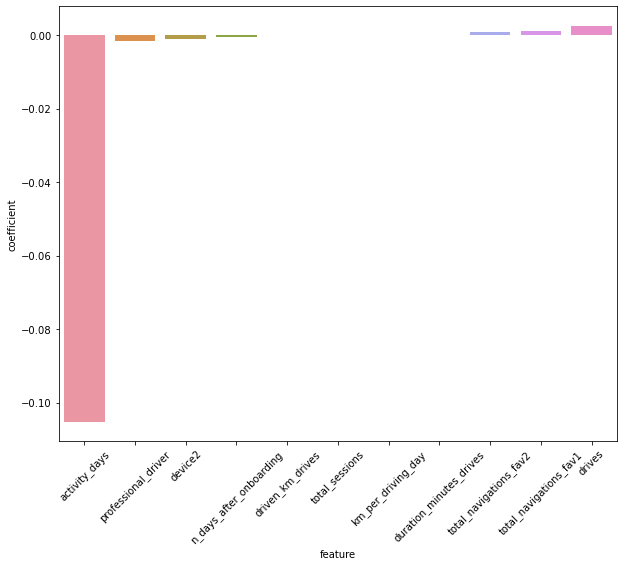

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=features, x='feature', y='coefficient')
plt.xticks(rotation=45)
plt.show()

### Conclusion

1. The variable activity_days most negatively influenced the model's prediction. The more activity days a user has, the less likely he is to be churned. That's not surprising. However, the number of drives unexpectedly influenced the model's prediction: with the rise of this variable, the probability of the certain user being churned rises, too. I also expected the variable km_per_driving_day to be a stronger predictor.
2. Most of the variables are not strong predictors of user churn. Moreover, this model has a very small recall, which means there are a lot of false negative values (it predicts user retention, but this user was actually churned). Therefor I would not recommend Waze use this model.